In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from comet_ml import API
import pandas as pd
import joblib
from src.features.q3_plots import *
import src.features.feature_engineering_2 as feng2

In [3]:
from dotenv import load_dotenv
load_dotenv()

# Initialise comet API
api = API()

In [4]:
def test_model(api, experiment_name, model_name, X_test, y_test):
    experiment = api.get(f"tedoul/ift6758-project/{experiment_name}")    
    experiment.download_model(model_name, output_path="data/models/", expand=True)

    model_path = f"data/models/{model_name}.joblib"
    model = joblib.load(model_path)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    plot_metrics(y_test.values, y_pred_proba)

In [27]:
def separate_games(df):
    # Convert gameID to string for easy slicing
    df['gameID'] = df['gameID'].astype(str)

    regular_season_df = df[df['gameID'].str.slice(4, 6) == '02']
    playoffs_df = df[df['gameID'].str.slice(4, 6) == '03']

    regular_season_df.reset_index(drop=True, inplace = True)
    playoffs_df.reset_index(drop=True, inplace = True)
    return regular_season_df, playoffs_df

### Regression lineaire modele 1

In [ ]:
# Load test set
df = None
X, y = None

In [ ]:
test_model(api, 'insert experiment name', 'insert model name', X, y)

### Regression lineaire modele 2

In [ ]:
# Load test set
df = None
X, y = None

In [ ]:
test_model(api, 'insert experiment name', 'insert model name', X, y)

### Regression lineaire modele 3

In [ ]:
# Load test set
df = None
X, y = None

In [ ]:
test_model(api, 'insert experiment name', 'insert model name', X, y)

### XGB Meilleur modele

In [29]:
# Load test set
data = pd.read_csv('../data/datasets/csv_files/2020-v2.csv')
seasons_data, playoffs_data = separate_games(data)

X_season, y_season = feng2.select_features(seasons_data)
X_playoffs, y_playoffs = feng2.select_features(playoffs_data)

c:\users\mk_ya\desktop\ift6758-projet\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\users\mk_ya\desktop\ift6758-projet\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


COMET INFO: Downloading experiment model 'xgb_hypertuned' ...
COMET INFO: Unzipping model to 'data/models/' ...
COMET INFO: done!


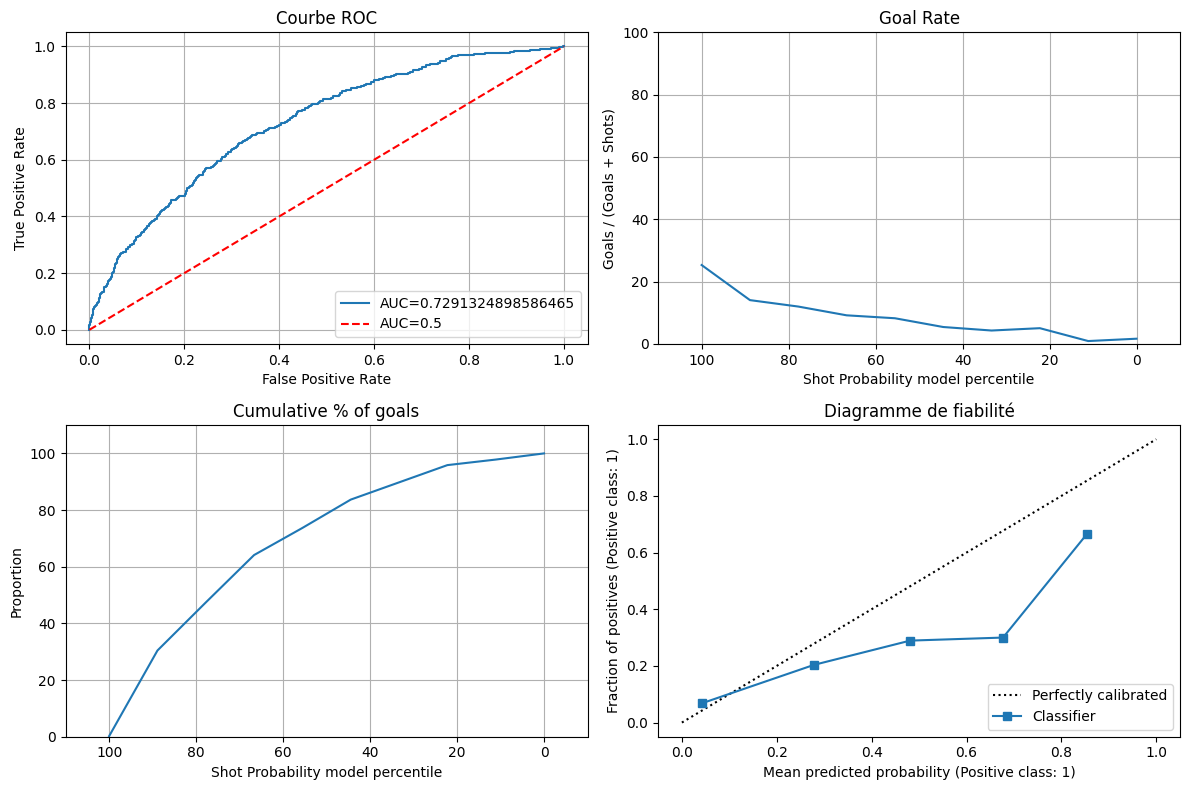

In [32]:
# Evaluate model on test set
test_model(api, 'xgb_hypertuned_f1', 'xgb_hypertuned', X_playoffs, y_playoffs)

### Meilleure modele

In [ ]:
# Load test set
df = None
X, y = None

In [ ]:
test_model(api, 'insert experiment name', 'insert model name', X, y)